<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Making-a-lead-qualification-quiz-shorter:-a-data-driven-approach" data-toc-modified-id="Making-a-lead-qualification-quiz-shorter:-a-data-driven-approach-1">Making a lead qualification quiz shorter: a data-driven approach</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Xoel-López-Barata---@xoelipedes" data-toc-modified-id="Xoel-López-Barata---@xoelipedes-1.0.0.1">Xoel López Barata - <a href="https://twitter.com/xoelipedes" target="_blank">@xoelipedes</a></a></span></li></ul></li></ul></li></ul></li><li><span><a href="#The-problem" data-toc-modified-id="The-problem-2">The problem</a></span><ul class="toc-item"><li><span><a href="#The-quiz" data-toc-modified-id="The-quiz-2.1">The quiz</a></span></li><li><span><a href="#Goals" data-toc-modified-id="Goals-2.2">Goals</a></span></li></ul></li><li><span><a href="#The-data" data-toc-modified-id="The-data-3">The data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#What-does-'passed'-mean?" data-toc-modified-id="What-does-'passed'-mean?-3.0.1">What does 'passed' mean?</a></span></li></ul></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4">Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Number-of-people-that-got-N-questions-right" data-toc-modified-id="Number-of-people-that-got-N-questions-right-4.1">Number of people that got N questions right</a></span></li><li><span><a href="#Time-to-complete-questions" data-toc-modified-id="Time-to-complete-questions-4.2">Time to complete questions</a></span></li><li><span><a href="#Time-to-complete-the-quiz-in-total" data-toc-modified-id="Time-to-complete-the-quiz-in-total-4.3">Time to complete the quiz in total</a></span></li><li><span><a href="#Time-per-question" data-toc-modified-id="Time-per-question-4.4">Time per question</a></span></li><li><span><a href="#Difficulty----%-of-the-people-that-get-right-each-question" data-toc-modified-id="Difficulty----%-of-the-people-that-get-right-each-question-4.5">Difficulty  - % of the people that get right each question</a></span></li><li><span><a href="#Time-VS-difficulty" data-toc-modified-id="Time-VS-difficulty-4.6">Time VS difficulty</a></span></li><li><span><a href="#Who-to-focus-on?" data-toc-modified-id="Who-to-focus-on?-4.7">Who to focus on?</a></span></li><li><span><a href="#Correlation-of-answers" data-toc-modified-id="Correlation-of-answers-4.8">Correlation of answers</a></span></li></ul></li><li><span><a href="#Question-importances" data-toc-modified-id="Question-importances-5">Question importances</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#The-basic-idea:-we're-training-a-maching-learning-algorithm" data-toc-modified-id="The-basic-idea:-we're-training-a-maching-learning-algorithm-5.0.1">The basic idea: we're training a maching learning algorithm</a></span></li><li><span><a href="#Permutation-importance-in-3-lines" data-toc-modified-id="Permutation-importance-in-3-lines-5.0.2">Permutation importance in 3 lines</a></span></li></ul></li></ul></li><li><span><a href="#The-most-important-plot..." data-toc-modified-id="The-most-important-plot...-6">The most important plot...</a></span></li><li><span><a href="#Recapping..." data-toc-modified-id="Recapping...-7">Recapping...</a></span></li><li><span><a href="#Finally:-removing-questions" data-toc-modified-id="Finally:-removing-questions-8">Finally: removing questions</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9">Conclusion</a></span></li></ul></div>

In [2]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import numpy as np

%matplotlib inline

In [3]:
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf

In [4]:
pd.options.display.max_columns = 100
pd.options.display.max_columns

100

In [5]:
from IPython.core.display import display, HTML, Markdown
# display(HTML("<style>.container { width:100% !important; }</style>"))

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Making a lead qualification quiz shorter: a data-driven approach

#### Xoel López Barata - [@xoelipedes](https://twitter.com/xoelipedes)

# The problem

## The quiz

* Isn't completed by ~50% of people that register
* Takes ~1h to complete
* Random set of 8 questions taken out of a bank of 12

## Goals

* Get more people to take the quiz?
* Get less people to not abandon the quiz?
* Make it shorter?

# The data

* Only students that started the quiz are included (so ~50% of users on Apply are excluded because there's no data for them I could use)
* The dataset has ~2700 students


In [6]:
df = pd.read_pickle('answers.pkl')
df

result                                                         \
     red_dad hurt_tea left_bread lean_throat frail_food chief_scene   
0       True     True       True         NaN       True        True   
1        NaN    False        NaN         NaN        NaN         NaN   
2        NaN     True       True        True        NaN         NaN   
3       True    False        NaN        True        NaN         NaN   
4       True      NaN        NaN       False       True       False   
...      ...      ...        ...         ...        ...         ...   
2702    True    False        NaN       False        NaN       False   
2703     NaN      NaN        NaN         NaN        NaN         NaN   
2704     NaN      NaN        NaN         NaN        NaN         NaN   
2705     NaN      NaN        NaN         NaN        NaN         NaN   
2706     NaN      NaN        NaN         NaN        NaN         NaN   

                                                                            \
     huge_depth long_road sweet_gate parched_night scarce_hair smooth_love   
0           NaN      True        NaN          True         NaN        True   
1           NaN       NaN        NaN           NaN         NaN         NaN   
2          True      True       True           NaN        True        True   
3          True      True      False           NaN       False       False   
4           NaN      True       True          True        True         NaN   
...         ...       ...        ...           ...         ...         ...   
2702       True     False        NaN           NaN       False       False   
2703        NaN       NaN        NaN           NaN         NaN         NaN   
2704        NaN       NaN        NaN           NaN         NaN         NaN   
2705        NaN       NaN        NaN           NaN         NaN         NaN   
2706        NaN       NaN        NaN           NaN         NaN         NaN   

     time_to_complete                                                \
              red_dad    hurt_tea left_bread lean_throat frail_food   
0                 NaN         NaN        NaN         NaN        NaN   
1                 NaN  128.470957        NaN         NaN        NaN   
2                 NaN         NaN        NaN         NaN        NaN   
3                 NaN         NaN        NaN         NaN        NaN   
4                 NaN         NaN        NaN         NaN        NaN   
...               ...         ...        ...         ...        ...   
2702              NaN         NaN        NaN         NaN        NaN   
2703              NaN         NaN        NaN         NaN        NaN   
2704              NaN         NaN        NaN         NaN        NaN   
2705              NaN         NaN        NaN         NaN        NaN   
2706              NaN         NaN        NaN         NaN        NaN   

                                                                            \
     chief_scene huge_depth long_road sweet_gate parched_night scarce_hair   
0            NaN        NaN       NaN        NaN           NaN         NaN   
1            NaN        NaN       NaN        NaN           NaN         NaN   
2            NaN        NaN       NaN        NaN           NaN         NaN   
3            NaN        NaN       NaN        NaN           NaN         NaN   
4            NaN        NaN       NaN        NaN           NaN         NaN   
...          ...        ...       ...        ...           ...         ...   
2702         NaN        NaN       NaN        NaN           NaN         NaN   
2703         NaN        NaN       NaN        NaN           NaN         NaN   
2704         NaN        NaN       NaN        NaN           NaN         NaN   
2705         NaN        NaN       NaN        NaN           NaN         NaN   
2706         NaN        NaN       NaN        NaN           NaN         NaN   

                                        status num_questions_right passed  \
     smooth_love                                   

### What does 'passed' mean?

* A student got 6 or more questions right
* A student got 5 questions right and its status is not `rejected_at_initial_evaluation` or `rejected_at_logic_evaluation`

I'll try to find out which questions are the best predictors of good logical thinking. 

# Exploratory Data Analysis

In any data project, the first part will always be an exploration of the data to understand how the variables are distributed and related to each other. 

This will let us know which questions to ask and in which direction to go with our analysis. 

## Number of people that got N questions right

In [7]:
df.result.sum(axis=1).iplot('hist', 
#                                  histnorm='percent',
                                 yTitle='Number of poeple', 
                                 xTitle='Number of questions right',
                                 title='Number of people that got N questions right',
                                 layout_update={'hovermode': 'x'})

In [223]:
df.result.sum(axis=1).iplot('hist', 
                                 histnorm='percent',
                                 yTitle='%', 
                                 xTitle='Number of questions right',
                                 title='Percentages of people that got N questions right',
                                 layout_update={'hovermode': 'x',
                                                'yaxis': {'ticksuffix': '%',
                                                          'tickformat': ',.3s'
                                                         }
                                               })

In [35]:
df.result.sum(axis=1).value_counts().sort_index()

0.0    223
1.0    107
2.0    123
3.0    119
4.0    162
5.0    223
6.0    354
7.0    626
8.0    770
dtype: int64

In [36]:
(df.result.sum(axis=1).value_counts().sort_index().cumsum() / len(df))

0.0    0.082379
1.0    0.121906
2.0    0.167344
3.0    0.211304
4.0    0.271149
5.0    0.353528
6.0    0.484300
7.0    0.715552
8.0    1.000000
dtype: float64

In [224]:
# to see where to put the threshold if we reduce the number of questions

(df.result.sum(axis=1).value_counts().sort_index().cumsum() / len(df)).iplot(
    'bar',
    layout_update={'yaxis': {'tickformat': ',.0%'},
                   'hovermode': 'x'},
    title='Share of people that got N or less questions right',
    xTitle='Number of questions right')

In [225]:
# to see where to put the threshold if we reduce the number of questions

(df.result.sum(axis=1).value_counts().sort_index(ascending=False).cumsum() / len(df)).iplot(
    'bar',
    layout_update={'yaxis': {'tickformat': ',.0%'},
                   'hovermode': 'x'},
    title='Share of people that got N or more questions right',
    xTitle='Number of questions right')

* 52% of the people get 7 or 8 questions right
* 21% get 5 or 6 right
* 27% get 4 or less right.  
* ~73% of the people pass the test.

## Time to complete questions

In [38]:
(df.time_to_complete.dropna(axis=0, how='all') / 
 60).mean(axis=1).iplot('hist', 
                        layout_update={'hovermode':'x'}, 
                        xTitle='Minutes',  
                        yTitle='Number of people',
                        title='Average time per question')
#looks like there are some outliers

In [39]:
# Days that took the people that took the longest to finish the quiz
df.time_to_complete.dropna(axis=0, how='all').sum(axis=1).sort_values().tail(15) / 3600 / 24

1849     0.480199
2056     0.579216
1185     0.678893
1934     1.071648
2043     1.213217
2297     1.635683
2243     1.698801
1135     1.778927
1703     3.070038
1484     3.241401
2328     5.681289
1203     7.472340
1991    12.088824
2085    27.034919
2101    73.784916
dtype: float64

In [40]:
# determining the max percentile to consider

(df.time_to_complete.quantile(q=np.linspace(0.9, 1, 21)) / 60)

red_dad    hurt_tea   left_bread  lean_throat    frail_food  \
0.900     8.242251   12.852802     8.319873     6.773566     12.652122   
0.905     8.405368   13.030706     8.509247     6.927997     12.958302   
0.910     8.498101   13.415992     8.837681     7.110555     13.386549   
0.915     8.567789   13.784652     9.344668     7.188860     13.535532   
0.920     8.709044   14.319962     9.729604     7.468471     13.726398   
0.925     9.216961   14.668834     9.908510     7.772216     13.945216   
0.930     9.413229   15.021540    10.192716     8.116752     14.312902   
0.935     9.662955   15.398410    10.269815     8.336810     14.556780   
0.940    10.143565   15.872879    11.103596     9.062798     14.916164   
0.945    10.354905   16.653980    11.392274     9.157585     15.116599   
0.950    11.305888   17.475820    11.653887     9.557830     15.879751   
0.955    11.472035   18.068814    11.852773     9.941503     16.707194   
0.960    12.049251   18.830696    12.495371    10.164407     16.885079   
0.965    12.620072   19.498482    12.681740    10.268112     17.808699   
0.970    13.553722   21.561743    13.214349    10.499302     20.116436   
0.975    14.253397   22.394486    14.391067    11.587213     24.933339   
0.980    16.023708   23.629706    16.294965    12.594636     30.156068   
0.985    17.115435   25.355477    16.752410    13.896786     31.924801   
0.990    21.123982   26.083454    18.278487    15.521998     37.460477   
0.995   195.284192   34.146385    23.077189    20.908551    812.157051   
1.000  2234.989019  614.145566  4420.364442    42.263841  38903.316488   

       chief_scene   huge_depth    long_road    sweet_gate  parched_night  \
0.900    15.114241    24.845851    10.919321     14.431263      10.696830   
0.905    15.354817    25.096328    11.239309     14.566779      10.952692   
0.910    15.663581    25.436525    11.437318     14.632736      11.271362   
0.915    16.275103    25.798785    11.582115     14.787109      11.622168   
0.920    16.680242    27.433201    11.772376     15.311494      12.016077   
0.925    17.605961    27.494543    11.945932     15.675153      12.132514   
0.930    17.855537    27.729984    12.110066     15.759999      12.271858   
0.935    17.930593    28.656583    12.561946     17.021462      12.292000   
0.940    18.304495    29.057276    12.796573     17.487302      12.560652   
0.945    19.155557    29.567169    12.975837     17.721495      13.246203   
0.950    19.897649    30.106158    13.218894     18.286749      13.744221   
0.955    20.536671    30.569934    13.621779     18.402427      15.011396   
0.960    21.514619    32.112361    13.894555     18.801994      15.476377   
0.965    22.662193    34.695721    14.273139     23.280973      15.816571   
0.970    24.962798    37.132569    14.708169     26.779219      16.069990   
0.975    25.264210    38.077939    17.077532     29.698868      17.184584   
0.980    30.329843    41.695303    18.339059     33.761945      18.299083   
0.985    33.162779    51.639957    19.375824     35.332520      21.370770   
0.990    42.388199    61.127854    24.989475     51.035216      26.111880   
0.995   166.563374   219.948202    77.930322     75.513936      34.905511   
1.000   924.005979  4623.024009  7245.509807  10698.150880  106221.798284   

       scarce_hair  smooth_love  
0.900    14.720139    13.183664  
0.905    15.085250    13.454720  
0.910    15.663837    13.825690  
0.915    16.113368    14.000731  
0.920    16.600400    14.288102  
0.925    16.899532    14.877883  
0.930    17.807479    15.248132  
0.935    18.356468    15.414184  
0.940    18.665300    15.854882  
0.945    19.490560    16.599342  
0.950    20.785992    17.074235  
0.955    23.092553    17.904854  
0.960    24.815069    18.565469  
0.965    25.487234    18.984957  
0.970    27.323720    19.619133  
0.975    28.707965    22.164172  
0.980    34.435708    23.271540  
0.985    38.210464    25.392794  
0.990    46.819916    27.726949  
0.995  

In [41]:
(df.time_to_complete.quantile(q=np.linspace(0.9, 1, 101)) 
 / 60).iplot(logy=True,
             layout_update={'hovermode':'x',
                            'plot_bgcolor': '#eeeeee',
                            'xaxis': {'side': 'top',
                                      'tickformat': ',.1%'},
                            'title': {'text': 'Visualizing in which percentile the outliers start to appear',
                                      'y': 0.97,}},
             xTitle='Percentile',
             yTitle='Minutes',
             width=2,
#              title='Visualizing in which percentile the outliers start to appear'
             )

# we can get rid of times above the 99% percentile. Note the scale. Log/linear

In [42]:
def drop_outliers(data, max_quantile = 0.99):
    result = data[data < data.quantile(max_quantile)]
    return result

In [43]:
# df.time_to_complete = drop_outliers(df.time_to_complete.dropna(axis=0, how='all'))

In [44]:
time_to_complete = drop_outliers(df.time_to_complete.dropna(axis=0, how='all')) / 60
time_to_complete.head()

red_dad   hurt_tea  left_bread  lean_throat  frail_food  chief_scene  \
1         NaN   2.141183         NaN          NaN         NaN          NaN   
14        NaN  10.751862         NaN    10.486832    4.827511     8.068434   
37   3.854484  17.836102         NaN     2.416543         NaN     7.400926   
57        NaN  10.235627         NaN     3.136361         NaN          NaN   
112       NaN   6.859677     3.95769          NaN    7.986494     9.862715   

     huge_depth  long_road  sweet_gate  parched_night  scarce_hair  \
1           NaN        NaN         NaN            NaN          NaN   
14          NaN        NaN    5.107313       4.226990    16.052463   
37          NaN   4.499068         NaN       6.875361     6.657682   
57          NaN        NaN         NaN            NaN          NaN   
112         NaN  11.659158    9.539755            NaN    14.449671   

     smooth_love  
1            NaN  
14      8.465902  
37      6.854487  
57           NaN  
112    13.825690

In [45]:
time_to_complete.mean(axis=1).head()

1      2.141183
14     8.498413
37     7.049332
57     6.685994
112    9.767606
dtype: float64

In [46]:
time_to_complete.iplot('hist', barmode='group', layout_update={'hovermode': 'x'}, bins=20)

There are some questions that some people took way to long to answer, so we have outliers that distort the graph and don't let us see clearly the distribution of time each question took. 

It's necessary to remove those outliers to see it better. 

After deleting the times of the questions that took longer than the 99% percentile, the data looks much clearer. We can see that people take about 6 minutes per question. 

If we remove the longest questions, this number can go down too.

In [47]:
time_to_complete.mean(axis=1).iplot('hist',
                                    layout_update={'hovermode': 'x'},
                                    xTitle='Minutes',
                                    yTitle='Number of people',
                                    title='Average time per question, no outliers')

## Time to complete the quiz in total

In [48]:
total_time = drop_outliers(df.time_to_complete / 60).dropna(axis=0, how='all').sum(axis=1)
# display(total_time.describe(percentiles = [.1, .25, .75, .9]))
total_time.iplot('hist', title='Total time to complete the quiz')

In [240]:
total_time_passed = pd.DataFrame({'Time to complete the quiz': total_time, 'Passed': df.passed}).dropna()
total_time_passed

Time to complete the quiz  Passed
1                      2.141183   False
14                    67.987307    True
37                    56.394653   False
57                    13.371989   False
112                   78.140849    True
...                         ...     ...
2678                  45.961940   False
2679                  37.063863    True
2682                   4.399114   False
2689                   0.802475   False
2701                  16.678070   False

[772 rows x 2 columns]

In total, most of the people are taking between 30 minutes and 1h15 to complete the quiz

In [241]:
total_time_passed.Passed.replace(False, 'Didn\'t pass').replace(True, 'Passed')

1       Didn't pass
14           Passed
37      Didn't pass
57      Didn't pass
112          Passed
           ...     
2678    Didn't pass
2679         Passed
2682    Didn't pass
2689    Didn't pass
2701    Didn't pass
Name: Passed, Length: 772, dtype: object

In [242]:
total_time_passed['Passed'] = total_time_passed.Passed.replace(False, 'Didn\'t pass').replace(True, 'Passed')
total_time_passed

Time to complete the quiz       Passed
1                      2.141183  Didn't pass
14                    67.987307       Passed
37                    56.394653  Didn't pass
57                    13.371989  Didn't pass
112                   78.140849       Passed
...                         ...          ...
2678                  45.961940  Didn't pass
2679                  37.063863       Passed
2682                   4.399114  Didn't pass
2689                   0.802475  Didn't pass
2701                  16.678070  Didn't pass

[772 rows x 2 columns]

In [243]:
total_time_passed.pivot(columns='Passed')['Time to complete the quiz']\
    .iplot('hist', 
           barmode='group',
           layout_update={'hovermode': 'x'},
           bins=50,
           xTitle='Total time to complete the quiz',
           yTitle='Number of people',
           title='Time to complete the quiz, separated by whether the person passed or not')

The people that take the least amount of time normally don't pass, while after 15-20 mins spent on the test we start seeing people that passed.

In [51]:
total_time_passed.pivot(columns='Passed')['Time to complete the quiz']

Passed      False      True 
1        2.141183        NaN
14            NaN  67.987307
37      56.394653        NaN
57      13.371989        NaN
112           NaN  78.140849
...           ...        ...
2678    45.961940        NaN
2679          NaN  37.063863
2682     4.399114        NaN
2689     0.802475        NaN
2701    16.678070        NaN

[772 rows x 2 columns]

In [52]:
total_time_passed.pivot(columns='Passed').describe(percentiles = [.1, .25, .75, .9])

Time to complete the quiz            
Passed                     False       True 
count                 225.000000  547.000000
mean                   29.758225   58.163178
std                    25.002258   24.080567
min                     0.490827   13.808439
10%                     2.255248   31.599868
25%                     9.938650   41.223433
50%                    24.727960   53.227885
75%                    42.510889   69.981794
90%                    64.602628   91.641684
max                   110.998541  153.635121

## Time per question

In [53]:
median_time = pd.Series(time_to_complete.quantile(0.5).sort_values(ascending=False), name='Median time (minutes)')
median_time.iplot('bar',
                  layout_update={'hovermode': 'x'},
                  title='Median time to complete each question',
                  yTitle='Minutes')

In [54]:
questions_sorted_median_time = time_to_complete.quantile(0.5).sort_values(ascending=False).index
fig_times_box_plot = go.Figure()
for question in questions_sorted_median_time:
    fig_times_box_plot.add_trace(go.Box(y=time_to_complete[question],
                         name=question,
                         boxpoints='all',
                         showlegend=False,
                         jitter=0.3,
                         marker = dict(size = 4),
                         text=time_to_complete[question].apply(lambda x: f'{x:.1f} mins'),
                        ))
fig_times_box_plot.layout.title='Time to complete each question (minutes)'
fig_times_box_plot.layout.yaxis.title = 'Minutes'
fig_times_box_plot.layout.yaxis.ticksuffix = ' min'

In [247]:
median_time

huge_depth       10.105253
chief_scene       7.218838
sweet_gate        6.753527
hurt_tea          5.800526
smooth_love       5.516701
parched_night     5.408823
scarce_hair       5.342117
long_road         5.276620
frail_food        5.273024
red_dad           4.084204
left_bread        3.612293
lean_throat       2.634215
Name: Median time (minutes), dtype: float64

In [248]:
Markdown(f'Some questions take much longer than others, like `{median_time.index[0]}` (~10 mins),' + 
         f' while others like `{median_time.index[-1]}` take less than 3 minutes. ')

Some questions take much longer than others, like `huge_depth` (~10 mins), while others like `lean_throat` take less than 3 minutes. 

In [203]:
# fig_times_box_plot
iplot(fig_times_box_plot, show_link=True)

Here we can see the distribution of time for each question. The best we can get from this graph is that for some questions, like `spilled_milk`, even though the median time they take is not very long, there are some people that take much longer to answer it than for other questions.

The same thing happens with `extracurricular_activities` or `massage_therapist`

## Difficulty  - % of the people that get right each question

In [56]:
df.result

red_dad hurt_tea left_bread lean_throat frail_food chief_scene  \
0       True     True       True         NaN       True        True   
1        NaN    False        NaN         NaN        NaN         NaN   
2        NaN     True       True        True        NaN         NaN   
3       True    False        NaN        True        NaN         NaN   
4       True      NaN        NaN       False       True       False   
...      ...      ...        ...         ...        ...         ...   
2702    True    False        NaN       False        NaN       False   
2703     NaN      NaN        NaN         NaN        NaN         NaN   
2704     NaN      NaN        NaN         NaN        NaN         NaN   
2705     NaN      NaN        NaN         NaN        NaN         NaN   
2706     NaN      NaN        NaN         NaN        NaN         NaN   

     huge_depth long_road sweet_gate parched_night scarce_hair smooth_love  
0           NaN      True        NaN          True         NaN        True  
1           NaN       NaN        NaN           NaN         NaN         NaN  
2          True      True       True           NaN        True        True  
3          True      True      False           NaN       False       False  
4           NaN      True       True          True        True         NaN  
...         ...       ...        ...           ...         ...         ...  
2702       True     False        NaN           NaN       False       False  
2703        NaN       NaN        NaN           NaN         NaN         NaN  
2704        NaN       NaN        NaN           NaN         NaN         NaN  
2705        NaN       NaN        NaN           NaN         NaN         NaN  
2706        NaN       NaN        NaN           NaN         NaN         NaN  

[2707 rows x 12 columns]

In [57]:
df.result.sum(axis=1)

0       8.0
1       0.0
2       8.0
3       4.0
4       6.0
       ... 
2702    2.0
2703    0.0
2704    0.0
2705    0.0
2706    0.0
Length: 2707, dtype: float64

In [58]:
hit_ratio = (df.result.sum() / df.result.count()).sort_values(ascending=False)
hit_ratio.name = '% answers right'
hit_ratio

long_road        0.887805
red_dad          0.877214
chief_scene      0.820211
parched_night    0.815552
sweet_gate       0.789886
huge_depth       0.774368
left_bread       0.773960
hurt_tea         0.772265
lean_throat      0.685882
smooth_love      0.651177
frail_food       0.646884
scarce_hair      0.606479
Name: % answers right, dtype: float64

In [59]:
hit_ratio.iplot('bar', title='% of people that get each question right',
                layout_update={'yaxis': {'dtick': 0.1,
                                         'tickformat': ',.1%',
                                         'range': (0.5, 0.9)
                                         },
                               'hovermode': 'x'})

Some questions like `hackday` or `adoption` are gotten right by most of the people. In theory, those shouldn't be very useful to tell us how likely a student is to pass the quiz or not, as most of them are answering them correctly. 

We'll see later if this is true. 

## Time VS difficulty

In [60]:
df_metrics = pd.DataFrame([hit_ratio, median_time]).T
df_metrics

% answers right  Median time (minutes)
long_road             0.887805               5.276620
red_dad               0.877214               4.084204
chief_scene           0.820211               7.218838
parched_night         0.815552               5.408823
sweet_gate            0.789886               6.753527
huge_depth            0.774368              10.105253
left_bread            0.773960               3.612293
hurt_tea              0.772265               5.800526
lean_throat           0.685882               2.634215
smooth_love           0.651177               5.516701
frail_food            0.646884               5.273024
scarce_hair           0.606479               5.342117

In [61]:
import seaborn as sns

cm = sns.light_palette("red", as_cmap=True)

Now that we have median times and the percentage of people that get each question right, we can more easily compare the data for each question:

In [62]:
df_metrics.style.format({'% answers right': '{:.1%}',
                         'Median time (minutes)': '{:.1f}'}, )\
    .bar(subset=["% answers right", ], color='lightblue')\
    .bar(subset=["Median time (minutes)"], color='#ee1f5f')

We can also plot is with a scatterplot, but this is still not enough information to take a decision on which questions are the best to take out of the quiz. 

In [63]:
fig = px.scatter(df_metrics, 
                 y='% answers right', 
                 x='Median time (minutes)', 
                 text=df_metrics.index)
fig.update_traces(textposition='top center')
fig.layout.title = 'Time VS difficulty'
fig.layout.yaxis.tickformat = ',.1%'
fig.layout.yaxis.tickformat = ',.1%'
fig

## Who to focus on?

 * People that leave before finishing?
 * People that never get to take the quiz?

To answer this question, we should look at how many people are leaving the quiz half-trough. If it's a significant amount of people, we should also focus on them. 

But if they're not, the focus should be on making the quiz shorter so that that can be announced and more people potentially take the quiz and join the school.

In [64]:
df.columns.levels[0]

Index(['answer', 'completed_at', 'result', 'time_to_complete', 'status', 'id',
       'user_id', 'num_questions_right', 'passed', 'quiz_questions'],
      dtype='object')

In [65]:
answered_questions = df.result.count(axis=1)
answered_questions

0       8
1       1
2       8
3       8
4       8
       ..
2702    8
2703    0
2704    0
2705    0
2706    0
Length: 2707, dtype: int64

In [66]:
answered_questions.value_counts().sort_index()

0     133
1      43
2      23
3      22
4      11
5       6
6       3
7       5
8    2461
dtype: int64

In [202]:
fig = answered_questions.iplot('hist',
                               histnorm='percent',
                               yTitle='% of applicants',
                               title='% of applicants that answer n questions',
                               xTitle='Number of questions',
                               asFigure=True,
                               layout_update={'hovermode': 'x',
#                                               'yaxis': {'tickformat': ',.1%'}
                                              },
                               )
iplot(fig, show_link=True)

As we see, most of the people (91%) answer the 8 questions of the quiz, and about 6.5% of them only answer 1 or no question at all. 

In [200]:
fig = (answered_questions.value_counts().sort_index().cumsum() /
       answered_questions.count() * 100).iplot('bar',
                                               title='% of people that answer N questions or less',
                                               yTitle='% of people',
                                               asFigure=True,
                                               layout_update={'hovermode': 'x'}
                                               )
iplot(fig, show_link=True)

About 8% of poeple answer only 3 questions or less. 

In [69]:
df.result.sum(axis=1)

0       8.0
1       0.0
2       8.0
3       4.0
4       6.0
       ... 
2702    2.0
2703    0.0
2704    0.0
2705    0.0
2706    0.0
Length: 2707, dtype: float64

In [70]:
rate_right = (df.result.sum(axis=1) / df.result.count(axis=1)).fillna(0) * 100
rate_right

0       100.0
1         0.0
2       100.0
3        50.0
4        75.0
        ...  
2702     25.0
2703      0.0
2704      0.0
2705      0.0
2706      0.0
Length: 2707, dtype: float64

In [71]:
df_right = df.result.sum(axis=1).fillna(0)
df_right

0       8.0
1       0.0
2       8.0
3       4.0
4       6.0
       ... 
2702    2.0
2703    0.0
2704    0.0
2705    0.0
2706    0.0
Length: 2707, dtype: float64

In [72]:
answers_df = pd.DataFrame({
    '# questions answered': answered_questions,
    '# answers right': df_right,
    '% answers right': rate_right
})
answers_df

# questions answered  # answers right  % answers right
0                        8              8.0            100.0
1                        1              0.0              0.0
2                        8              8.0            100.0
3                        8              4.0             50.0
4                        8              6.0             75.0
...                    ...              ...              ...
2702                     8              2.0             25.0
2703                     0              0.0              0.0
2704                     0              0.0              0.0
2705                     0              0.0              0.0
2706                     0              0.0              0.0

[2707 rows x 3 columns]

In [73]:
answers_df.groupby('# questions answered').mean()['% answers right']

# questions answered
0     0.000000
1    13.953488
2    28.260870
3    34.848485
4    61.363636
5    56.666667
6    44.444444
7    51.428571
8    76.325681
Name: % answers right, dtype: float64

In [74]:
answers_df.groupby('# questions answered').mean()[['% answers right']].iplot(
    'bar', title='% of questions answered right, on average, by # of questions answered',
    xTitle='Number of questions answered',
    yTitle='% answers right',
    layout_update={'hovermode': 'x'}

)

And here we see the % of right questions that people get, among the people that answer few questions, is very low. 

So those people probably are not good enough and the focus shouldn't be on them. 

Therefore, what should tried to be done is making the quiz shorter so that more people take it in the first place. This will be done by taking out questions, and to decide that, I'll calculate the importance of each one, to take out the least important ones and the ones that take the longest.

## Correlation of answers

This is something I tried but wasn't so useful: Getting the correlation between the answers. If there were some pairs of answers with a correlation very close to 1, it would mean that people that got one right would also get the other one right most of the time, and viceversa, and one of those two questions could be removed. But it wasn't the case

In [75]:
df.result.corr(method='spearman')

Empty DataFrame
Columns: []
Index: []

In [76]:
df.result

red_dad hurt_tea left_bread lean_throat frail_food chief_scene  \
0       True     True       True         NaN       True        True   
1        NaN    False        NaN         NaN        NaN         NaN   
2        NaN     True       True        True        NaN         NaN   
3       True    False        NaN        True        NaN         NaN   
4       True      NaN        NaN       False       True       False   
...      ...      ...        ...         ...        ...         ...   
2702    True    False        NaN       False        NaN       False   
2703     NaN      NaN        NaN         NaN        NaN         NaN   
2704     NaN      NaN        NaN         NaN        NaN         NaN   
2705     NaN      NaN        NaN         NaN        NaN         NaN   
2706     NaN      NaN        NaN         NaN        NaN         NaN   

     huge_depth long_road sweet_gate parched_night scarce_hair smooth_love  
0           NaN      True        NaN          True         NaN        True  
1           NaN       NaN        NaN           NaN         NaN         NaN  
2          True      True       True           NaN        True        True  
3          True      True      False           NaN       False       False  
4           NaN      True       True          True        True         NaN  
...         ...       ...        ...           ...         ...         ...  
2702       True     False        NaN           NaN       False       False  
2703        NaN       NaN        NaN           NaN         NaN         NaN  
2704        NaN       NaN        NaN           NaN         NaN         NaN  
2705        NaN       NaN        NaN           NaN         NaN         NaN  
2706        NaN       NaN        NaN           NaN         NaN         NaN  

[2707 rows x 12 columns]

In [77]:
corr = df.result.astype(float).corr()
corr

red_dad  hurt_tea  left_bread  lean_throat  frail_food  \
red_dad        1.000000  0.350203    0.406540     0.242637    0.287505   
hurt_tea       0.350203  1.000000    0.418612     0.316353    0.369703   
left_bread     0.406540  0.418612    1.000000     0.325583    0.330436   
lean_throat    0.242637  0.316353    0.325583     1.000000    0.274249   
frail_food     0.287505  0.369703    0.330436     0.274249    1.000000   
chief_scene    0.444274  0.434242    0.450872     0.273855    0.271582   
huge_depth     0.238852  0.382765    0.318383     0.223120    0.208495   
long_road      0.364306  0.401981    0.357439     0.258714    0.271624   
sweet_gate     0.354027  0.427681    0.377114     0.253063    0.291110   
parched_night  0.371198  0.311129    0.258829     0.199377    0.216387   
scarce_hair    0.238169  0.334678    0.372794     0.279290    0.388680   
smooth_love    0.242515  0.350490    0.381231     0.211606    0.292656   

               chief_scene  huge_depth  long_road  sweet_gate  parched_night  \
red_dad           0.444274    0.238852   0.364306    0.354027       0.371198   
hurt_tea          0.434242    0.382765   0.401981    0.427681       0.311129   
left_bread        0.450872    0.318383   0.357439    0.377114       0.258829   
lean_throat       0.273855    0.223120   0.258714    0.253063       0.199377   
frail_food        0.271582    0.208495   0.271624    0.291110       0.216387   
chief_scene       1.000000    0.281613   0.387252    0.330245       0.281473   
huge_depth        0.281613    1.000000   0.272313    0.326892       0.188640   
long_road         0.387252    0.272313   1.000000    0.316335       0.227076   
sweet_gate        0.330245    0.326892   0.316335    1.000000       0.325303   
parched_night     0.281473    0.188640   0.227076    0.325303       1.000000   
scarce_hair       0.291702    0.298402   0.228101    0.291095       0.239773   
smooth_love       0.254042    0.184440   0.190272    0.284255       0.235544   

               scarce_hair  smooth_love  
red_dad           0.238169     0.242515  
hurt_tea          0.334678     0.350490  
left_bread        0.372794     0.381231  
lean_throat       0.279290     0.211606  
frail_food        0.388680     0.292656  
chief_scene       0.291702     0.254042  
huge_depth        0.298402     0.184440  
long_road         0.228101     0.190272  
sweet_gate        0.291095     0.284255  
parched_night     0.239773     0.235544  
scarce_hair       1.000000     0.259183  
smooth_love       0.259183     1.000000

In [78]:
corr.describe()

red_dad   hurt_tea  left_bread  lean_throat  frail_food  chief_scene  \
count  12.000000  12.000000   12.000000    12.000000   12.000000    12.000000   
mean    0.378352   0.424820    0.416486     0.321487    0.350202     0.391763   
std     0.208338   0.185914    0.190719     0.217047    0.211345     0.205257   
min     0.238169   0.311129    0.258829     0.199377    0.208495     0.254042   
25%     0.242607   0.346322    0.329223     0.237758    0.271613     0.279568   
50%     0.352115   0.376234    0.374954     0.266285    0.289307     0.310973   
75%     0.380033   0.420879    0.409558     0.288556    0.340253     0.436750   
max     1.000000   1.000000    1.000000     1.000000    1.000000     1.000000   

       huge_depth  long_road  sweet_gate  parched_night  scarce_hair  \
count   12.000000  12.000000   12.000000      12.000000    12.000000   
mean     0.326993   0.356284    0.381427       0.321227     0.351822   
std      0.220341   0.213946    0.200172       0.220553     0.210412   
min      0.184440   0.190272    0.253063       0.188640     0.228101   
25%      0.219464   0.251061    0.291106       0.224404     0.254331   
50%      0.276963   0.294324    0.326097       0.249301     0.291399   
75%      0.320511   0.370043    0.359799       0.314672     0.344207   
max      1.000000   1.000000    1.000000       1.000000     1.000000   

       smooth_love  
count    12.000000  
mean      0.323853  
std       0.220962  
min       0.184440  
25%       0.229559  
50%       0.256612  
75%       0.307115  
max       1.000000

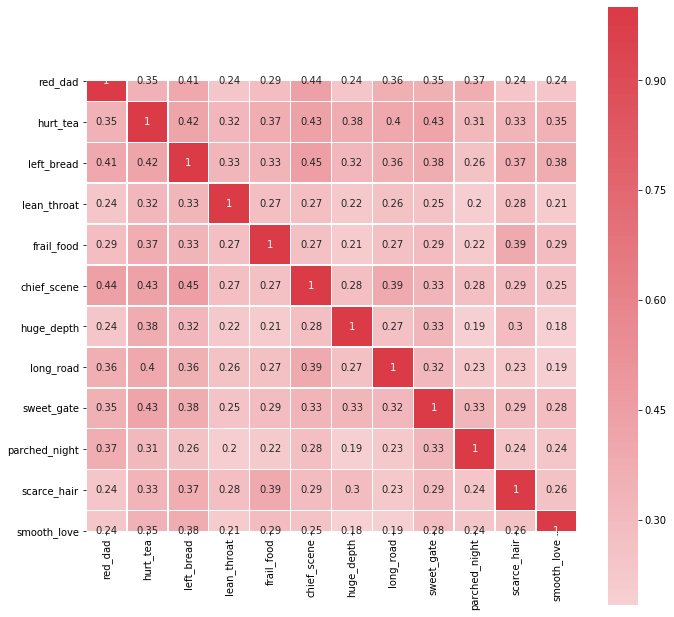

In [79]:
# source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,  center=0, annot=True,
            square=True, linewidths=.5, );

In [80]:
### Network graph from correlation matrix

In [81]:
# source: https://python-graph-gallery.com/327-network-from-correlation-matrix/

import networkx as nx

In [82]:
corr.stack().reset_index()

level_0        level_1         0
0        red_dad        red_dad  1.000000
1        red_dad       hurt_tea  0.350203
2        red_dad     left_bread  0.406540
3        red_dad    lean_throat  0.242637
4        red_dad     frail_food  0.287505
..           ...            ...       ...
139  smooth_love      long_road  0.190272
140  smooth_love     sweet_gate  0.284255
141  smooth_love  parched_night  0.235544
142  smooth_love    scarce_hair  0.259183
143  smooth_love    smooth_love  1.000000

[144 rows x 3 columns]

In [83]:
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links

var1           var2     value
0        red_dad        red_dad  1.000000
1        red_dad       hurt_tea  0.350203
2        red_dad     left_bread  0.406540
3        red_dad    lean_throat  0.242637
4        red_dad     frail_food  0.287505
..           ...            ...       ...
139  smooth_love      long_road  0.190272
140  smooth_love     sweet_gate  0.284255
141  smooth_love  parched_night  0.235544
142  smooth_love    scarce_hair  0.259183
143  smooth_love    smooth_love  1.000000

[144 rows x 3 columns]

In [84]:
corr.where(corr>0.2, 0)

red_dad  hurt_tea  left_bread  lean_throat  frail_food  \
red_dad        1.000000  0.350203    0.406540     0.242637    0.287505   
hurt_tea       0.350203  1.000000    0.418612     0.316353    0.369703   
left_bread     0.406540  0.418612    1.000000     0.325583    0.330436   
lean_throat    0.242637  0.316353    0.325583     1.000000    0.274249   
frail_food     0.287505  0.369703    0.330436     0.274249    1.000000   
chief_scene    0.444274  0.434242    0.450872     0.273855    0.271582   
huge_depth     0.238852  0.382765    0.318383     0.223120    0.208495   
long_road      0.364306  0.401981    0.357439     0.258714    0.271624   
sweet_gate     0.354027  0.427681    0.377114     0.253063    0.291110   
parched_night  0.371198  0.311129    0.258829     0.000000    0.216387   
scarce_hair    0.238169  0.334678    0.372794     0.279290    0.388680   
smooth_love    0.242515  0.350490    0.381231     0.211606    0.292656   

               chief_scene  huge_depth  long_road  sweet_gate  parched_night  \
red_dad           0.444274    0.238852   0.364306    0.354027       0.371198   
hurt_tea          0.434242    0.382765   0.401981    0.427681       0.311129   
left_bread        0.450872    0.318383   0.357439    0.377114       0.258829   
lean_throat       0.273855    0.223120   0.258714    0.253063       0.000000   
frail_food        0.271582    0.208495   0.271624    0.291110       0.216387   
chief_scene       1.000000    0.281613   0.387252    0.330245       0.281473   
huge_depth        0.281613    1.000000   0.272313    0.326892       0.000000   
long_road         0.387252    0.272313   1.000000    0.316335       0.227076   
sweet_gate        0.330245    0.326892   0.316335    1.000000       0.325303   
parched_night     0.281473    0.000000   0.227076    0.325303       1.000000   
scarce_hair       0.291702    0.298402   0.228101    0.291095       0.239773   
smooth_love       0.254042    0.000000   0.000000    0.284255       0.235544   

               scarce_hair  smooth_love  
red_dad           0.238169     0.242515  
hurt_tea          0.334678     0.350490  
left_bread        0.372794     0.381231  
lean_throat       0.279290     0.211606  
frail_food        0.388680     0.292656  
chief_scene       0.291702     0.254042  
huge_depth        0.298402     0.000000  
long_road         0.228101     0.000000  
sweet_gate        0.291095     0.284255  
parched_night     0.239773     0.235544  
scarce_hair       1.000000     0.259183  
smooth_love       0.259183     1.000000

/Users/xoel/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



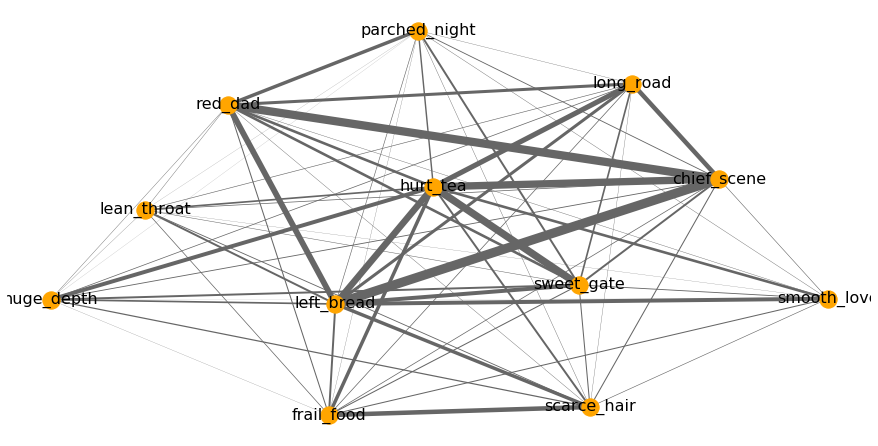

In [85]:
G = nx.from_pandas_adjacency(corr)
# G = nx.from_pandas_adjacency(corr.where(corr>0.3, 0)) # filter out correlations < 0.3
layout = nx.spring_layout(G)

labels = nx.get_edge_attributes(G, "weight")
labels = {key: f'{float(value):.2f}' for key, value in labels.items()}


nx.draw(G, 
        layout, 
        with_labels=True, 
        edge_color='#666666', 
        width=[float(v)**5*500 for v in labels.values()],
        node_color='orange',
        font_size=16,
        font_color='black')

# to print weights
# nx.draw_networkx_edge_labels(G, pos=layout)
# nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)


plt.show()

In [86]:
weights = {key: float(value) for key, value in labels.items() if float(value) < 1}
pd.Series(weights).sort_values(ascending=False).iplot('hist', bins=40)

# Question importances

### The basic idea: we're training a maching learning algorithm

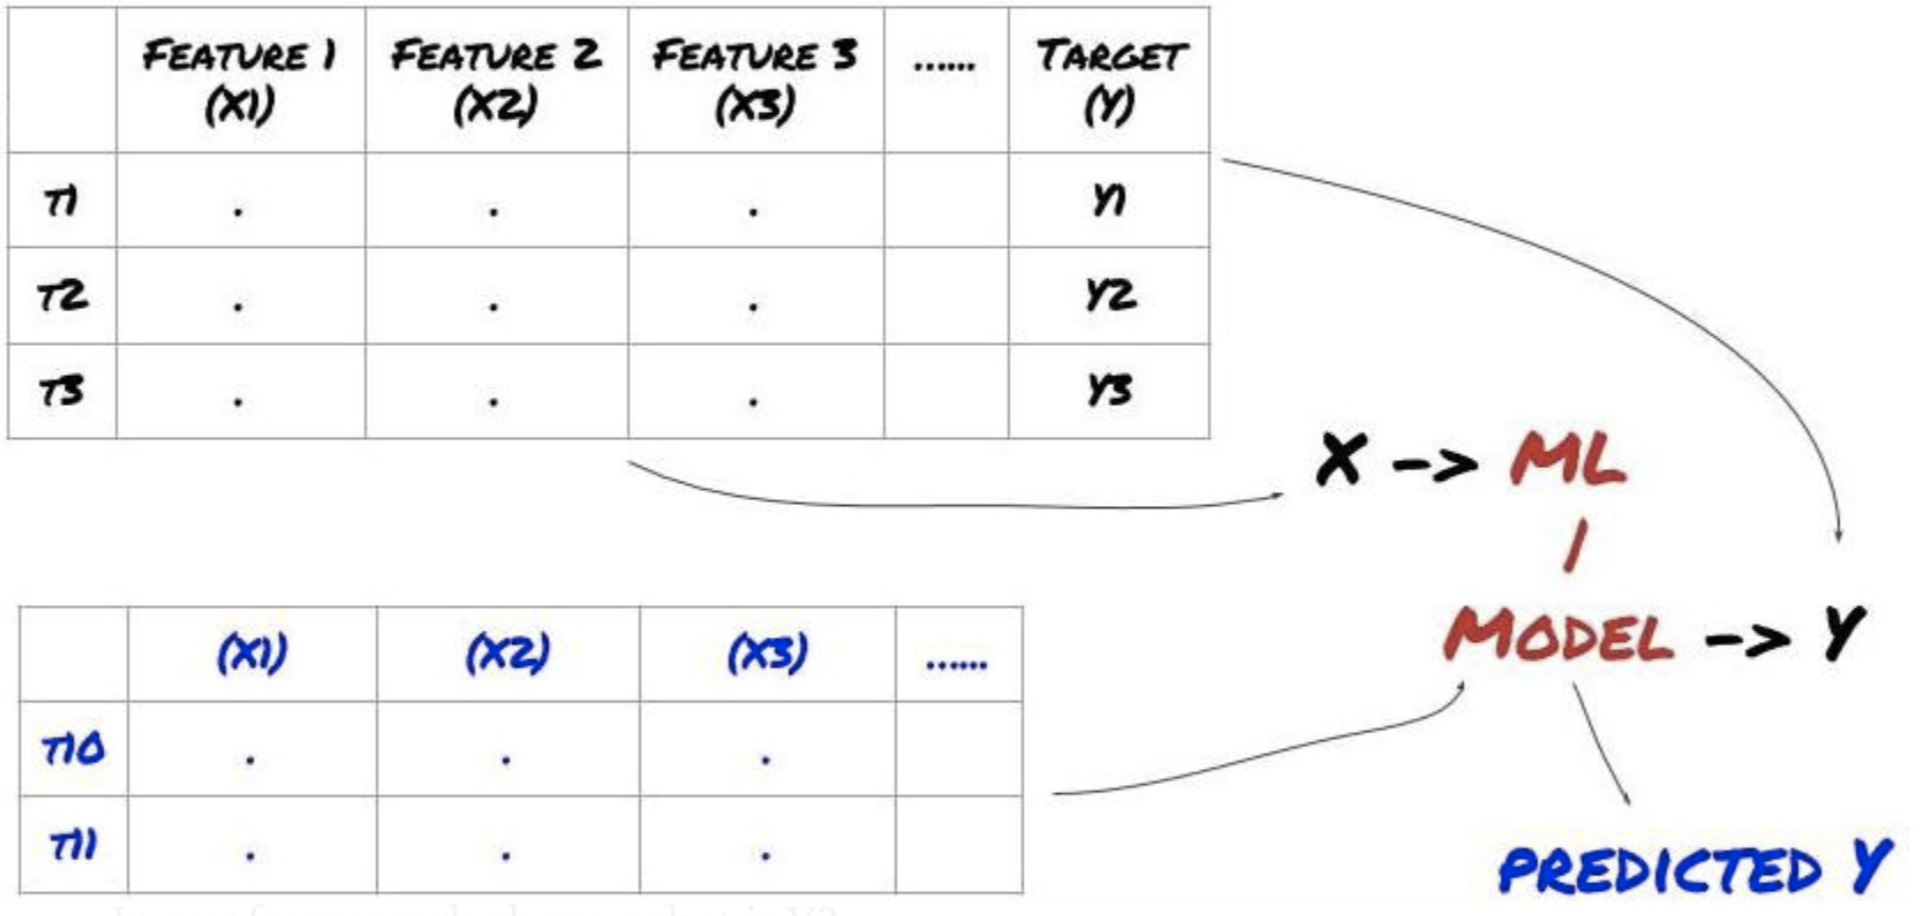

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [88]:
X = df.result
y = df.passed

In [89]:
# filling the nans because the model doesn't accept nan values
X = X.fillna(0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestClassifier()

model.fit(X_train, y_train)

/Users/xoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
print(classification_report(y_val, model.predict(X_val)))

              precision    recall  f1-score   support

       False       0.97      0.96      0.96       271
        True       0.96      0.97      0.97       271

    accuracy                           0.96       542
   macro avg       0.96      0.96      0.96       542
weighted avg       0.96      0.96      0.96       542



In [91]:
y_val.sum() / y_val.count()

0.5

To calculate importances, I'll first train a machine learning algorithm to try to predict whether a student passed or not, based on his answers.

Then, I'll remove the answers for each one of the questions of the dataset. The algorithm's performance will decrease.

The questions where the algorithm performance decreases the most will be the most important ones.

In [92]:
### Adding random columns to see baselines for importances

In [93]:
# we add a random column to have a threshold for importance
# seen in https://explained.ai/rf-importance/index.html

random_column = pd.Series(np.random.choice([0, 1], len(df.result)), name='random')
random_column

0       0
1       0
2       1
3       1
4       1
       ..
2702    0
2703    1
2704    0
2705    0
2706    0
Name: random, Length: 2707, dtype: int64

In [94]:
# we add a random column to have a threshold for importance
# seen in https://explained.ai/rf-importance/index.html
# this time with 3 values

random_column_with_nans = pd.Series(np.random.choice([np.nan, 0, 1], len(df.result)), name='random_with_nans')
random_column_with_nans

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2702    1.0
2703    0.0
2704    0.0
2705    0.0
2706    NaN
Name: random_with_nans, Length: 2707, dtype: float64

In [95]:
X = X.join(random_column)
X = X.join(random_column_with_nans)
X.head()

red_dad hurt_tea left_bread lean_throat frail_food chief_scene huge_depth  \
0    True     True       True           0       True        True          0   
1       0    False          0           0          0           0          0   
2       0     True       True        True          0           0       True   
3    True    False          0        True          0           0       True   
4    True        0          0       False       True       False          0   

  long_road sweet_gate parched_night scarce_hair smooth_love  random  \
0      True          0          True           0        True       0   
1         0          0             0           0           0       0   
2      True       True             0        True        True       1   
3      True      False             0       False       False       1   
4      True       True          True        True           0       1   

   random_with_nans  
0               0.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0

In [96]:
# filling the nans because the model doesn't accept nan values
X = X.fillna(0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestClassifier()

model.fit(X_train, y_train)

/Users/xoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Permutation importance in 3 lines

In [181]:
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, cv=5)

perm.fit(X_train, y_train)

PermutationImportance(cv=5,
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=10,
                                                       n_jobs

In [182]:
perm.feature_importances_

array([0.01459826, 0.03881439, 0.03334844, 0.0201425 , 0.01976807,
       0.02087406, 0.01793308, 0.01210167, 0.01552076, 0.01959313,
       0.02723863, 0.01746436, 0.00148042, 0.00175499])

In [183]:
X_train.columns

Index(['red_dad', 'hurt_tea', 'left_bread', 'lean_throat', 'frail_food',
       'chief_scene', 'huge_depth', 'long_road', 'sweet_gate', 'parched_night',
       'scarce_hair', 'smooth_love', 'random', 'random_with_nans'],
      dtype='object')

In [184]:
importances = pd.Series(perm.feature_importances_, X_train.columns).sort_values(ascending=False)
importances.name = 'Importance'
importances

hurt_tea            0.038814
left_bread          0.033348
scarce_hair         0.027239
chief_scene         0.020874
lean_throat         0.020142
frail_food          0.019768
parched_night       0.019593
huge_depth          0.017933
smooth_love         0.017464
sweet_gate          0.015521
red_dad             0.014598
long_road           0.012102
random_with_nans    0.001755
random              0.001480
Name: Importance, dtype: float64

In [185]:
importances.iplot('bar', title='Importance of each question', layout_update={'hovermode': 'x'})

In [187]:
df_metrics['Importance'] = importances
df_metrics

% answers right  Median time (minutes)  Importance
long_road             0.887805               5.276620    0.012102
red_dad               0.877214               4.084204    0.014598
chief_scene           0.820211               7.218838    0.020874
parched_night         0.815552               5.408823    0.019593
sweet_gate            0.789886               6.753527    0.015521
huge_depth            0.774368              10.105253    0.017933
left_bread            0.773960               3.612293    0.033348
hurt_tea              0.772265               5.800526    0.038814
lean_throat           0.685882               2.634215    0.020142
smooth_love           0.651177               5.516701    0.017464
frail_food            0.646884               5.273024    0.019768
scarce_hair           0.606479               5.342117    0.027239

Now we can compare all the 3 relevant metrics we've calculated for each question

In [188]:
df_metrics.sort_values('Importance', ascending=False)\
    .style.format({'% answers right': '{:.1%}',
                   'Median time (minutes)': '{:.1f}',
                   'Importance': '{:.2%}'}, )\
    .bar(subset=["% answers right", ], color='lightgreen', vmin=.5)\
    .bar(subset=["Median time (minutes)"], color='#ee1f5f', vmin=1)\
    .bar(subset=["Importance"], color='#FFA07A', vmin=.001)

In [198]:
fig = px.scatter(df_metrics,
                 x='% answers right',
                 y='Importance',
                 color='Median time (minutes)',
                 text=df_metrics.index)
fig.update_traces(textposition='top center', marker_size=20, marker_line_width=1)
fig.layout.title = 'Importance VS Time VS Difficulty'
iplot(fig, show_link=True)

# The most important plot...

Another way to represent in a more visual form the 3 metrics for each question

In [197]:
fig = px.scatter(df_metrics,
                 x='Median time (minutes)',
                 y='Importance',
                 color='% answers right',
                 text=df_metrics.index,)
fig.update_traces(textposition='top center', marker_size=20, marker_line_width=1)
fig.layout.title = 'Importance VS Time VS Difficulty'
iplot(fig, show_link=True)

# Recapping...

1. We want to have the questions that give us the most information
2. We want to make quiz shorter
3. Because the goal is to get more people to take the quiz

In [106]:
importances

hurt_tea            0.032804
left_bread          0.027803
parched_night       0.017563
scarce_hair         0.017456
smooth_love         0.015803
lean_throat         0.015516
chief_scene         0.015511
frail_food          0.015152
sweet_gate          0.012558
huge_depth          0.012200
long_road           0.010528
red_dad             0.005731
random_with_nans   -0.000369
random             -0.002310
Name: Importance, dtype: float64

In [107]:
fig_times_box_plot

In [108]:
## Extra: Feature dependances

In [109]:
from scipy.stats import pearsonr, spearmanr

In [110]:
# spearmanr(df.result).correlation
# fails because there are nans

In [111]:
df.result.astype(float).corr('spearman')

red_dad  hurt_tea  left_bread  lean_throat  frail_food  \
red_dad        1.000000  0.350203    0.406540     0.242637    0.287505   
hurt_tea       0.350203  1.000000    0.418612     0.316353    0.369703   
left_bread     0.406540  0.418612    1.000000     0.325583    0.330436   
lean_throat    0.242637  0.316353    0.325583     1.000000    0.274249   
frail_food     0.287505  0.369703    0.330436     0.274249    1.000000   
chief_scene    0.444274  0.434242    0.450872     0.273855    0.271582   
huge_depth     0.238852  0.382765    0.318383     0.223120    0.208495   
long_road      0.364306  0.401981    0.357439     0.258714    0.271624   
sweet_gate     0.354027  0.427681    0.377114     0.253063    0.291110   
parched_night  0.371198  0.311129    0.258829     0.199377    0.216387   
scarce_hair    0.238169  0.334678    0.372794     0.279290    0.388680   
smooth_love    0.242515  0.350490    0.381231     0.211606    0.292656   

               chief_scene  huge_depth  long_road  sweet_gate  parched_night  \
red_dad           0.444274    0.238852   0.364306    0.354027       0.371198   
hurt_tea          0.434242    0.382765   0.401981    0.427681       0.311129   
left_bread        0.450872    0.318383   0.357439    0.377114       0.258829   
lean_throat       0.273855    0.223120   0.258714    0.253063       0.199377   
frail_food        0.271582    0.208495   0.271624    0.291110       0.216387   
chief_scene       1.000000    0.281613   0.387252    0.330245       0.281473   
huge_depth        0.281613    1.000000   0.272313    0.326892       0.188640   
long_road         0.387252    0.272313   1.000000    0.316335       0.227076   
sweet_gate        0.330245    0.326892   0.316335    1.000000       0.325303   
parched_night     0.281473    0.188640   0.227076    0.325303       1.000000   
scarce_hair       0.291702    0.298402   0.228101    0.291095       0.239773   
smooth_love       0.254042    0.184440   0.190272    0.284255       0.235544   

               scarce_hair  smooth_love  
red_dad           0.238169     0.242515  
hurt_tea          0.334678     0.350490  
left_bread        0.372794     0.381231  
lean_throat       0.279290     0.211606  
frail_food        0.388680     0.292656  
chief_scene       0.291702     0.254042  
huge_depth        0.298402     0.184440  
long_road         0.228101     0.190272  
sweet_gate        0.291095     0.284255  
parched_night     0.239773     0.235544  
scarce_hair       1.000000     0.259183  
smooth_love       0.259183     1.000000

In [112]:
import rfpimp

# based on https://github.com/parrt/random-forest-importances/blob/master/notebooks/pimp_plots.ipynb
# and https://explained.ai/rf-importance/index.html#corr_collinear

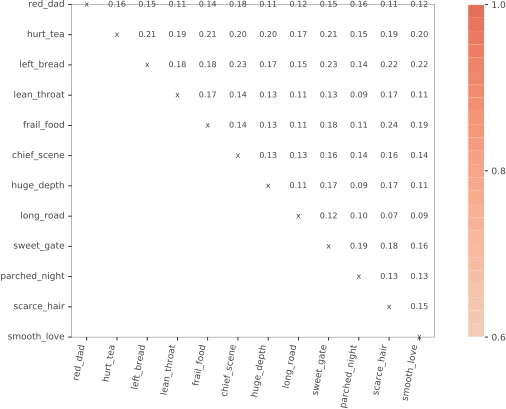

In [113]:
rfpimp.plot_corr_heatmap(df.result.fillna(df.result.mean()).astype(float))

# the results of this aren't valid because of the nans. it's not correct to do fillna mean

In [114]:
dependance_matrix = rfpimp.feature_dependence_matrix(df.result.fillna(-1).astype(float))

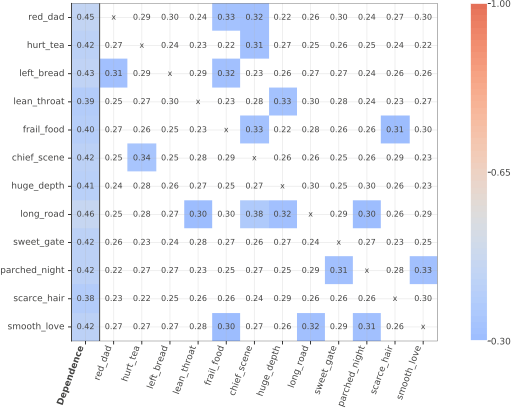

In [115]:
rfpimp.plot_dependence_heatmap(dependance_matrix, color_threshold=0.3)

In [116]:
dependance_matrix = rfpimp.feature_dependence_matrix(X.fillna(-1).astype(float))

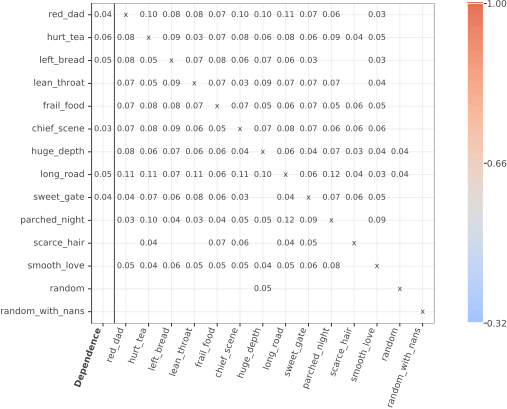

In [117]:
rfpimp.plot_dependence_heatmap(dependance_matrix, color_threshold=0.32)

In [118]:
dependance_matrix = rfpimp.feature_dependence_matrix(X_train.drop(columns=['random',
                                                                           'random_with_nans']).astype(float))

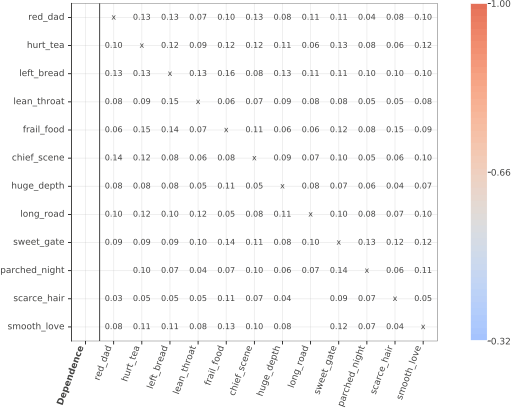

In [119]:
rfpimp.plot_dependence_heatmap(dependance_matrix, color_threshold=0.32)

# Finally: removing questions

In [251]:
Markdown(f"""Now, I'll remove questions from the quiz, starting from the least important ones, and see how many people would pass and how many people would not, from the original people that completed the quiz.

I'll always remove `{longest_questions[0]}`, as it takes a very long time to complete, compared to the other ones.

These results could help to decide where to put the new threshold for the minimum number of right questions, after removing questions. Ideally, the threshold would let everyone that passed before pass now, and reject everyone that didn't pass before. """)

Now, I'll remove questions from the quiz, starting from the least important ones, and see how many people would pass and how many people would not, from the original people that completed the quiz.

I'll always remove `huge_depth`, as it takes a very long time to complete, compared to the other ones.

These results could help to decide where to put the new threshold for the minimum number of right questions, after removing questions. Ideally, the threshold would let everyone that passed before pass now, and reject everyone that didn't pass before. 

1. Removing questions from the initial bank of questions (currently at 12 questions)
2. Showing people fewer questions than 8

In [120]:
def drop_questions(questions_names: list, data: pd.DataFrame):
    dropped_questions_data = data.drop(questions_names, axis=1, level=1)
    dropped_questions_data['questions_answered'] = dropped_questions_data.result.count(axis=1)
    dropped_questions_data['num_questions_right_after'] = dropped_questions_data.result.sum(axis=1)
    dropped_questions_data['percent_right_before'] = dropped_questions_data.num_questions_right / 8
    dropped_questions_data['percent_right_after'] = (dropped_questions_data.num_questions_right_after /
                                                     dropped_questions_data.questions_answered)
    dropped_questions_data.time_to_complete = drop_outliers(dropped_questions_data.time_to_complete)
    return dropped_questions_data

In [136]:
list(df_metrics['Median time (minutes)'].sort_values(ascending=False).index[:1])

['huge_depth']

In [137]:
longest_questions = list(df_metrics['Median time (minutes)'].sort_values(ascending=False).index[:1])

In [138]:
def get_questions_to_delete(importances: pd.Series,
                            num_questions: int = 4,
                            questions_always_delete=longest_questions):
    original_question_names = importances.sort_values().index.drop(questions_always_delete)
    num_extra_questions = len(questions_always_delete)
    questions = (questions_always_delete +
                 list(original_question_names[:num_questions-num_extra_questions]))
    return questions

In [139]:
dropped = drop_questions(questions_names=get_questions_to_delete(df_metrics.Importance, 4, questions_always_delete=[]), 
                         data=df)

In [140]:
def get_possible_number_questions(num_questions_removing: int):
    return np.arange(max(8-num_questions_removing, 1), min(13-num_questions_removing, 9))

In [141]:
{i: get_possible_number_questions(i) for i in range(1, 9)}

{1: array([7, 8]),
 2: array([6, 7, 8]),
 3: array([5, 6, 7, 8]),
 4: array([4, 5, 6, 7, 8]),
 5: array([3, 4, 5, 6, 7]),
 6: array([2, 3, 4, 5, 6]),
 7: array([1, 2, 3, 4, 5]),
 8: array([1, 2, 3, 4])}

In [142]:
nums_questions_to_remove = np.arange(1, 9)
nums_questions_to_remove

array([1, 2, 3, 4, 5, 6, 7, 8])

In [143]:
def drop_questions(questions_names: list, data: pd.DataFrame):
    dropped_questions_data = data.drop(questions_names, axis=1, level=1)
    dropped_questions_data['questions_answered_after'] = dropped_questions_data.result.count(axis=1)
    dropped_questions_data['num_questions_right_after'] = dropped_questions_data.result.sum(axis=1)
    dropped_questions_data['percent_right_before'] = dropped_questions_data.num_questions_right / 8
    dropped_questions_data['percent_right_after'] = (dropped_questions_data.num_questions_right_after /
                                                     dropped_questions_data.questions_answered_after)
    dropped_questions_data.time_to_complete = drop_outliers(dropped_questions_data.time_to_complete)
    return dropped_questions_data

In [144]:
def get_questions_to_delete(importances: pd.Series,
                            num_questions: int = 4,
                            questions_always_delete=longest_questions):
    original_question_names = importances.sort_values().index.drop(questions_always_delete)
    num_extra_questions = len(questions_always_delete)
    questions = (questions_always_delete +
                 list(original_question_names[:num_questions-num_extra_questions]))
    return questions

In [145]:
def display_info_dropped_subset(dropped, num_questions_answered, no_extra_info: bool = False):
    dropped_subset = dropped[dropped.questions_answered_after == num_questions_answered]
    times = (dropped_subset.time_to_complete.dropna(how='all').sum(axis=1).describe() / 60)
    display(Markdown(f'Times to complete the quiz (minutes): **Q1**: {times["25%"]:,.1f}. ' + 
                     f'**Median**: {times["50%"]:,.1f}. ' + 
                     f'**Q3**: {times["75%"]:,.1f}.'
                    ))
    if not no_extra_info:
        display(dropped_subset.pivot_table(index='num_questions_right_after',
                                           columns='passed',
                                           aggfunc='count')\
                .num_questions_right.fillna(0).style.bar(color='lightblue'))
        if len(dropped_subset) < 50:
            return
        get_thresholds_explanation(dropped_subset)

In [146]:
num_questions_to_delete = 4

questions_to_delete = get_questions_to_delete(df_metrics.Importance, num_questions_to_delete)
dropped = drop_questions(questions_to_delete, df)

num_questions_answered = 5


def plot_histogram_answers_after_removing_questions(dropped: pd.DataFrame,
                                                    num_questions_answered: int,
                                                    num_questions_removed: int):
    num_questions_right_after = dropped[dropped.questions_answered_after == num_questions_answered]\
        .pivot(columns='passed').num_questions_right_after.dropna(how='all')
    num_questions_right_after.columns = ['Not passed', 'Passed']
    title = (f'Distribution of answers from people that received {num_questions_answered}' +
             f' out of {12 - num_questions_removed} questions')
    num_questions_right_after.iplot('hist',
                                    barmode='stack',
                                    layout_update={'hovermode': 'x'},
                                    title=title,
                                    xTitle='Num questions right'
                                    )
plot_histogram_answers_after_removing_questions(dropped, num_questions_answered, num_questions_to_delete)

In [227]:
plot_histogram_answers_after_removing_questions(drop_questions([], df), 8, 0)

In [147]:
dropped_subset = dropped[dropped.questions_answered_after ==
                         num_questions_answered]

df_dropped_grouped_passed = dropped_subset.pivot_table(index='num_questions_right_after',
                                                       columns='passed',
                                                       aggfunc='count',
                                                       fill_value=0
                                                       ).num_questions_right.droplevel(0, axis=1)
df_dropped_grouped_passed

passed                     False  True 
num_questions_right_after              
0.0                           47      0
1.0                           88      0
2.0                           67     37
3.0                           23    141
4.0                            1    298
5.0                            0    419

In [148]:
passed = (df_dropped_grouped_passed.iloc[::-1].cumsum() / df_dropped_grouped_passed.sum())[True]
not_passed = (df_dropped_grouped_passed.cumsum() / df_dropped_grouped_passed.sum())[False]

passed

df_percentages_passed_not_passed = pd.DataFrame({
    "Didn't pass before, rejected now": not_passed,
    "Passed before, accepted now": passed
})

df_percentages_passed_not_passed.index.name = 'Threshold (minimum questions right)'

df_percentages_passed_not_passed\
    .style.format('{:,.1%}')\
    .bar(subset="Didn't pass before, rejected now", color='#FF5733', vmin=0, vmax=1)\
    .bar(subset='Passed before, accepted now', color='lightgreen', vmin=0, vmax=1)


In [149]:
def get_thresholds_explanation(dropped_subset: pd.DataFrame):
    df_dropped_grouped_passed = dropped_subset.pivot_table(index='num_questions_right_after',
                                                       columns='passed',
                                                       aggfunc='count',
                                                       fill_value=0
                                                       ).num_questions_right.droplevel(0, axis=1)
#     display(df_dropped_grouped_passed)
    display(Markdown(f'Total number of people: {len(dropped_subset)}. ' + 
                     f'People that did not pass: {df_dropped_grouped_passed.sum()[False]}. ' +
                     f'People that passed: {df_dropped_grouped_passed.sum()[True]}'))
    passed = (df_dropped_grouped_passed.iloc[::-1].cumsum() / df_dropped_grouped_passed.sum())[True]
    not_passed = (df_dropped_grouped_passed.cumsum() / df_dropped_grouped_passed.sum())[False].shift().fillna(0)


    df_percentages_passed_not_passed = pd.DataFrame({
        "Didn't pass before, rejected now": not_passed,
        "Passed before, accepted now": passed
    })
    
    total_values = df_dropped_grouped_passed.rename(columns={False: "Didn't pass before, rejected now",
                                                             True: "Passed before, accepted now"})

    df_percentages_passed_not_passed.index.name = 'Threshold (minimum questions right)'
    
    confidence_interval = np.sqrt(df_percentages_passed_not_passed * 
                                  (1 - df_percentages_passed_not_passed) /
                                  total_values.sum()) * 1.96
    confidence_interval.columns = [col + ': 95% conf. interval' for col in confidence_interval.columns]

    df_percentages_passed_not_passed = df_percentages_passed_not_passed.join(confidence_interval)
    display(df_percentages_passed_not_passed\
        .style.format('{:,.1%}')\
        .bar(subset="Didn't pass before, rejected now", color='#FF5733', vmin=0, vmax=1)\
        .bar(subset='Passed before, accepted now', color='lightgreen', vmin=0, vmax=1))
    return 


In [150]:
get_thresholds_explanation(dropped_subset)

Total number of people: 1121. People that did not pass: 226. People that passed: 895

In [151]:
display_info_dropped_subset(dropped, 4)

Times to complete the quiz (minutes): **Q1**: 15.7. **Median**: 22.3. **Q3**: 35.4.

Total number of people: 360. People that did not pass: 83. People that passed: 277

In [152]:
display_info_dropped_subset(dropped, 4)

Times to complete the quiz (minutes): **Q1**: 15.7. **Median**: 22.3. **Q3**: 35.4.

Total number of people: 360. People that did not pass: 83. People that passed: 277

In [153]:
{n: len(get_questions_to_delete(df_metrics.Importance, n)) for n in range(1, 9)}

{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}

In [154]:
{n: (get_questions_to_delete(df_metrics.Importance, n)) for n in range(1, 9)}

{1: ['huge_depth'],
 2: ['huge_depth', 'red_dad'],
 3: ['huge_depth', 'red_dad', 'long_road'],
 4: ['huge_depth', 'red_dad', 'long_road', 'sweet_gate'],
 5: ['huge_depth', 'red_dad', 'long_road', 'sweet_gate', 'frail_food'],
 6: ['huge_depth',
  'red_dad',
  'long_road',
  'sweet_gate',
  'frail_food',
  'chief_scene'],
 7: ['huge_depth',
  'red_dad',
  'long_road',
  'sweet_gate',
  'frail_food',
  'chief_scene',
  'lean_throat'],
 8: ['huge_depth',
  'red_dad',
  'long_road',
  'sweet_gate',
  'frail_food',
  'chief_scene',
  'lean_throat',
  'smooth_love']}

In [155]:
questions = get_questions_to_delete(df_metrics.Importance, 4)
questions
# questions = list(importances.index[:4])

['huge_depth', 'red_dad', 'long_road', 'sweet_gate']

In [156]:
dropped = drop_questions(questions_names=get_questions_to_delete(df_metrics.Importance, 4, questions_always_delete=[]), 
                         data=df)
dropped

answer  \
                        hurt_tea   
0        Clara purchased book 6.   
1     Johathan purchased book 5.   
2       Brooke purchased book 6.   
3          Sam purchased book 7.   
4                            NaN   
...                          ...   
2702    Joelle purchased book 7.   
2703                         NaN   
2704                         NaN   
2705                         NaN   
2706                         NaN   

                                                        \
                                            left_bread   
0     Alford has a meeting first thing in the morning.   
1                                                  NaN   
2                 Brendan is having lunch with Israel.   
3                                                  NaN   
4                                                  NaN   
...                                                ...   
2702                                               NaN   
2703                                               NaN   
2704                                               NaN   
2705                                               NaN   
2706                                               NaN   

                                                  \
                                     lean_throat   
0                                            NaN   
1                                            NaN   
2                    A beanie can only be green.   
3                    A hoodie can only be white.   
4     A hoodie can be turquoise, pink or yellow.   
...                                          ...   
2702       A t-shirt can be either pink or blue.   
2703                                         NaN   
2704                                         NaN   
2705                                         NaN   
2706                                         NaN   

                                                         \
                                             frail_food   
0           Gladyce juggles and practices figureskating   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4     Elouise attends a painting workshop and goes r...   
...                                                 ...   
2702                                                NaN   
2703                                                NaN   
2704                                                NaN   
2705                                                NaN   
2706                                                NaN   

                                                         \
                                            chief_scene   
0     1: Tomasa, 2: Paxton, 3: Jed, 4: Ford, 5: Juan...   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4     1: Kenyatta, 2: Solon, 3: Leo, 4: Jackeline, 5...   
...                                                 ...   
2702  1: Carole, 2: Maxie, 3: Willy, 4: Lauryn, 5: C...   
2703                                                NaN   
2704                                                NaN   
2705                                                NaN   
2706                                                NaN   

                                                         \
                                          parched_night   
0     Attending: Colton, Zachary, Jonathan, Joe, She...   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4     Attending: Vida, Zella, Nelda, Elmira, Tito, C...   
...                                                 ...   
2702                                                NaN   
2703                                                NaN   

In [157]:
(dropped.time_to_complete.dropna(how='all').sum(axis=1).describe() / 60)[['25%', '50%', '75%']]

25%    18.733741
50%    28.458545
75%    40.142348
dtype: float64

In [158]:
num_questions = 4
percents_right_after = dropped[dropped.questions_answered_after == num_questions]\
    .pivot(columns='passed').num_questions_right_after.dropna(how='all')
percents_right_after.columns = ['Not passed', 'Passed']
f = percents_right_after.iplot('hist',
                           barmode='stack',
                           layout_update={'hovermode': 'x'},
                           #                            bins=50,
                           title=f'Distribution of answers from people that received {num_questions} questions',
                           xTitle='Num questions right', asFigure = True
                           )
f

In [159]:
dropped[dropped.passed][['percent_right_before', 'percent_right_after', 'questions_answered_after']]

percent_right_before percent_right_after questions_answered_after
                                                                      
0                   1.000            1.000000                        6
2                   1.000            1.000000                        5
4                   0.750            0.600000                        5
5                   1.000            1.000000                        6
6                   1.000            1.000000                        4
...                   ...                 ...                      ...
2649                0.875            1.000000                        5
2653                0.750            0.800000                        5
2667                0.750            0.666667                        6
2679                1.000            1.000000                        5
2699                0.625            0.750000                        4

[1949 rows x 3 columns]

In [160]:
def get_indexes(nrows, ncols):
    
    indexes = []
    for nrow in range(1, nrows + 1):
        for ncol in range(1, ncols + 1):
            indexes.append((nrow, ncol))
    return indexes

get_indexes(3, 3)

[(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]

In [161]:
for i, (nrow, ncol) in enumerate(get_indexes(2, 2)):
    print(i, nrow, ncol)

0 1 1
1 1 2
2 2 1
3 2 2


In [162]:
dropped.questions_answered_after

0       6
1       1
2       5
3       4
4       5
       ..
2702    5
2703    0
2704    0
2705    0
2706    0
Name: questions_answered_after, Length: 2707, dtype: int64

In [163]:
nums_questions_removed = list(range(1, 10))
total_questions_answered_removing_n_questions = pd.DataFrame(columns=nums_questions_removed)
for num_questions_removed in nums_questions_removed:
    dropped = drop_questions(questions_names=get_questions_to_delete(df_metrics.Importance, num_questions_removed),
                             data=df)
    total_questions_answered_removing_n_questions[num_questions_removed] = dropped.questions_answered_after

total_questions_answered_removing_n_questions

1  2  3  4  5  6  7  8  9
0     8  7  6  6  5  4  4  3  3
1     1  1  1  1  1  1  1  1  1
2     7  7  6  5  5  5  4  3  2
3     7  6  5  4  4  4  3  2  1
4     8  7  6  5  4  3  2  2  1
...  .. .. .. .. .. .. .. .. ..
2702  7  6  5  5  5  4  3  2  1
2703  0  0  0  0  0  0  0  0  0
2704  0  0  0  0  0  0  0  0  0
2705  0  0  0  0  0  0  0  0  0
2706  0  0  0  0  0  0  0  0  0

[2707 rows x 9 columns]

In [164]:
total_questions_answered_removing_n_questions.iplot(
    'hist',
    subplots=True,
    title='Number of questions received, after removing N questions',
    yTitle='People',
#     xTitle='Number of questions',
    shared_xaxes=True,
#     shared_yaxes=True,
    layout_update={'height': 700,
                   'hovermode': 'x'},)


In [165]:
total_questions_answered_removing_n_questions.iplot(
    'hist',
    subplots=True,
    title='Number of questions gotten, after removing N questions',
    yTitle='People',
    xTitle='Number of questions',
#     shared_xaxes=True,
#     shared_yaxes=True,
    layout_update={'height': 700,
                   'hovermode': 'x'},)


In [166]:
get_possible_number_questions(1)

array([7, 8])

In [167]:
def report_drop_questions(df: pd.DataFrame, 
                          num_questions_answered: int, 
                          num_questions_to_remove: int,
                          no_extra_info: bool = False,
                          no_plot: bool = False):   
    questions_to_delete = get_questions_to_delete(df_metrics.Importance, num_questions_to_remove)
    display(Markdown(f'### Results for the people that received {num_questions_answered}' + 
                     f' questions out of {12 - num_questions_to_remove}'))
    display(Markdown(f'Questions to remove: {", ".join(questions_to_delete)}'))
    dropped = drop_questions(questions_to_delete, df)
    total_num_people = len(dropped[dropped.questions_answered_after == num_questions_answered])
    if total_num_people < 50:
        display(Markdown("Less than 50 people, probably not enough data to make significant conclusions"))
        return
    display_info_dropped_subset(dropped, num_questions_answered, no_extra_info)
    if not no_plot:
        plot_histogram_answers_after_removing_questions(dropped, 
                                                        num_questions_answered=num_questions_answered,
                                                        num_questions_removed=num_questions_to_remove)

In [168]:
questions_removed_questions_asked = {i: list(get_possible_number_questions(i)) for i in range(1, 12)}
questions_removed_questions_asked

{1: [7, 8],
 2: [6, 7, 8],
 3: [5, 6, 7, 8],
 4: [4, 5, 6, 7, 8],
 5: [3, 4, 5, 6, 7],
 6: [2, 3, 4, 5, 6],
 7: [1, 2, 3, 4, 5],
 8: [1, 2, 3, 4],
 9: [1, 2, 3],
 10: [1, 2],
 11: [1]}

In [169]:
questions_asked_questions_removed = {}
for key, values in questions_removed_questions_asked.items():
    for v in values:
        if not v in questions_asked_questions_removed:
            questions_asked_questions_removed[v] = [key]
        else:
            questions_asked_questions_removed[v].append(key)
questions_asked_questions_removed

{7: [1, 2, 3, 4, 5],
 8: [1, 2, 3, 4],
 6: [2, 3, 4, 5, 6],
 5: [3, 4, 5, 6, 7],
 4: [4, 5, 6, 7, 8],
 3: [5, 6, 7, 8, 9],
 2: [6, 7, 8, 9, 10],
 1: [7, 8, 9, 10, 11]}

In [170]:
numbers_questions_answered = sorted(questions_asked_questions_removed)[::-1]
numbers_questions_answered

[8, 7, 6, 5, 4, 3, 2, 1]

In [171]:
for num_questions_answered in numbers_questions_answered:
    display(Markdown(f'## Results for showing {num_questions_answered} questions'))
    # number of questions that would be answered by most of the people
    nums_questions_to_remove = questions_asked_questions_removed[num_questions_answered]
    for num_questions_to_remove in nums_questions_to_remove:
        report_drop_questions(df, num_questions_answered, num_questions_to_remove)

## Results for showing 8 questions

### Results for the people that received 8 questions out of 11

Questions to remove: huge_depth

Times to complete the quiz (minutes): **Q1**: 31.0. **Median**: 45.1. **Q3**: 61.5.

Total number of people: 817. People that did not pass: 173. People that passed: 644

### Results for the people that received 8 questions out of 10

Questions to remove: huge_depth, red_dad

Times to complete the quiz (minutes): **Q1**: 36.7. **Median**: 49.4. **Q3**: 67.3.

Total number of people: 224. People that did not pass: 44. People that passed: 180

### Results for the people that received 8 questions out of 9

Questions to remove: huge_depth, red_dad, long_road

Less than 50 people, probably not enough data to make significant conclusions

### Results for the people that received 8 questions out of 8

Questions to remove: huge_depth, red_dad, long_road, sweet_gate

Less than 50 people, probably not enough data to make significant conclusions

## Results for showing 7 questions

### Results for the people that received 7 questions out of 11

Questions to remove: huge_depth

Times to complete the quiz (minutes): **Q1**: 28.9. **Median**: 38.8. **Q3**: 55.2.

Total number of people: 1647. People that did not pass: 344. People that passed: 1303

### Results for the people that received 7 questions out of 10

Questions to remove: huge_depth, red_dad

Times to complete the quiz (minutes): **Q1**: 27.9. **Median**: 39.3. **Q3**: 55.4.

Total number of people: 1161. People that did not pass: 249. People that passed: 912

### Results for the people that received 7 questions out of 9

Questions to remove: huge_depth, red_dad, long_road

Times to complete the quiz (minutes): **Q1**: 29.8. **Median**: 40.4. **Q3**: 57.1.

Total number of people: 527. People that did not pass: 102. People that passed: 425

### Results for the people that received 7 questions out of 8

Questions to remove: huge_depth, red_dad, long_road, sweet_gate

Times to complete the quiz (minutes): **Q1**: 28.8. **Median**: 37.7. **Q3**: 50.7.

Total number of people: 156. People that did not pass: 36. People that passed: 120

### Results for the people that received 7 questions out of 7

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food

Less than 50 people, probably not enough data to make significant conclusions

## Results for showing 6 questions

### Results for the people that received 6 questions out of 10

Questions to remove: huge_depth, red_dad

Times to complete the quiz (minutes): **Q1**: 24.7. **Median**: 33.4. **Q3**: 46.6.

Total number of people: 1079. People that did not pass: 224. People that passed: 855

### Results for the people that received 6 questions out of 9

Questions to remove: huge_depth, red_dad, long_road

Times to complete the quiz (minutes): **Q1**: 23.0. **Median**: 33.4. **Q3**: 47.6.

Total number of people: 1267. People that did not pass: 276. People that passed: 991

### Results for the people that received 6 questions out of 8

Questions to remove: huge_depth, red_dad, long_road, sweet_gate

Times to complete the quiz (minutes): **Q1**: 24.0. **Median**: 33.3. **Q3**: 47.5.

Total number of people: 829. People that did not pass: 176. People that passed: 653

### Results for the people that received 6 questions out of 7

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food

Times to complete the quiz (minutes): **Q1**: 24.4. **Median**: 33.0. **Q3**: 47.5.

Total number of people: 334. People that did not pass: 78. People that passed: 256

### Results for the people that received 6 questions out of 6

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene

Times to complete the quiz (minutes): **Q1**: 28.1. **Median**: 33.4. **Q3**: 41.9.

Total number of people: 72. People that did not pass: 12. People that passed: 60

## Results for showing 5 questions

### Results for the people that received 5 questions out of 9

Questions to remove: huge_depth, red_dad, long_road

Times to complete the quiz (minutes): **Q1**: 20.3. **Median**: 30.3. **Q3**: 41.7.

Total number of people: 632. People that did not pass: 135. People that passed: 497

### Results for the people that received 5 questions out of 8

Questions to remove: huge_depth, red_dad, long_road, sweet_gate

Times to complete the quiz (minutes): **Q1**: 19.4. **Median**: 27.1. **Q3**: 37.6.

Total number of people: 1121. People that did not pass: 226. People that passed: 895

### Results for the people that received 5 questions out of 7

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food

Times to complete the quiz (minutes): **Q1**: 19.2. **Median**: 28.5. **Q3**: 38.4.

Total number of people: 1032. People that did not pass: 212. People that passed: 820

### Results for the people that received 5 questions out of 6

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene

Times to complete the quiz (minutes): **Q1**: 19.3. **Median**: 25.9. **Q3**: 35.8.

Total number of people: 605. People that did not pass: 148. People that passed: 457

### Results for the people that received 5 questions out of 5

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat

Times to complete the quiz (minutes): **Q1**: 20.9. **Median**: 30.4. **Q3**: 40.2.

Total number of people: 176. People that did not pass: 34. People that passed: 142

## Results for showing 4 questions

### Results for the people that received 4 questions out of 8

Questions to remove: huge_depth, red_dad, long_road, sweet_gate

Times to complete the quiz (minutes): **Q1**: 15.7. **Median**: 22.3. **Q3**: 35.4.

Total number of people: 360. People that did not pass: 83. People that passed: 277

### Results for the people that received 4 questions out of 7

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food

Times to complete the quiz (minutes): **Q1**: 15.0. **Median**: 21.2. **Q3**: 30.0.

Total number of people: 910. People that did not pass: 194. People that passed: 716

### Results for the people that received 4 questions out of 6

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene

Times to complete the quiz (minutes): **Q1**: 13.9. **Median**: 19.7. **Q3**: 29.7.

Total number of people: 1115. People that did not pass: 221. People that passed: 894

### Results for the people that received 4 questions out of 5

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat

Times to complete the quiz (minutes): **Q1**: 16.4. **Median**: 22.8. **Q3**: 32.4.

Total number of people: 839. People that did not pass: 183. People that passed: 656

### Results for the people that received 4 questions out of 4

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat, smooth_love

Times to complete the quiz (minutes): **Q1**: 14.5. **Median**: 22.7. **Q3**: 29.5.

Total number of people: 348. People that did not pass: 72. People that passed: 276

## Results for showing 3 questions

### Results for the people that received 3 questions out of 7

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food

Times to complete the quiz (minutes): **Q1**: 11.1. **Median**: 16.6. **Q3**: 29.4.

Total number of people: 182. People that did not pass: 47. People that passed: 135

### Results for the people that received 3 questions out of 6

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene

Times to complete the quiz (minutes): **Q1**: 9.9. **Median**: 15.2. **Q3**: 21.1.

Total number of people: 622. People that did not pass: 136. People that passed: 486

### Results for the people that received 3 questions out of 5

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat

Times to complete the quiz (minutes): **Q1**: 11.5. **Median**: 16.3. **Q3**: 22.1.

Total number of people: 1093. People that did not pass: 235. People that passed: 858

### Results for the people that received 3 questions out of 4

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat, smooth_love

Times to complete the quiz (minutes): **Q1**: 12.3. **Median**: 16.6. **Q3**: 22.7.

Total number of people: 1106. People that did not pass: 231. People that passed: 875

### Results for the people that received 3 questions out of 3

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat, smooth_love, scarce_hair

Times to complete the quiz (minutes): **Q1**: 11.9. **Median**: 15.6. **Q3**: 20.9.

Total number of people: 620. People that did not pass: 116. People that passed: 504

## Results for showing 2 questions

### Results for the people that received 2 questions out of 6

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene

Times to complete the quiz (minutes): **Q1**: 6.2. **Median**: 9.5. **Q3**: 14.6.

Total number of people: 96. People that did not pass: 44. People that passed: 52

### Results for the people that received 2 questions out of 5

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat

Times to complete the quiz (minutes): **Q1**: 6.8. **Median**: 10.1. **Q3**: 15.9.

Total number of people: 367. People that did not pass: 89. People that passed: 278

### Results for the people that received 2 questions out of 4

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat, smooth_love

Times to complete the quiz (minutes): **Q1**: 7.2. **Median**: 10.5. **Q3**: 14.8.

Total number of people: 873. People that did not pass: 205. People that passed: 668

### Results for the people that received 2 questions out of 3

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat, smooth_love, scarce_hair

Times to complete the quiz (minutes): **Q1**: 7.0. **Median**: 10.3. **Q3**: 14.3.

Total number of people: 1276. People that did not pass: 284. People that passed: 992

### Results for the people that received 2 questions out of 2

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat, smooth_love, scarce_hair, parched_night

Times to complete the quiz (minutes): **Q1**: 7.3. **Median**: 9.9. **Q3**: 13.9.

Total number of people: 1032. People that did not pass: 201. People that passed: 831

## Results for showing 1 questions

### Results for the people that received 1 questions out of 5

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat

Times to complete the quiz (minutes): **Q1**: 1.9. **Median**: 3.1. **Q3**: 8.5.

Total number of people: 66. People that did not pass: 51. People that passed: 15

### Results for the people that received 1 questions out of 4

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat, smooth_love

Times to complete the quiz (minutes): **Q1**: 2.1. **Median**: 5.4. **Q3**: 8.8.

Total number of people: 202. People that did not pass: 78. People that passed: 124

### Results for the people that received 1 questions out of 3

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat, smooth_love, scarce_hair

Times to complete the quiz (minutes): **Q1**: 3.3. **Median**: 5.4. **Q3**: 8.4.

Total number of people: 579. People that did not pass: 164. People that passed: 415

### Results for the people that received 1 questions out of 2

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat, smooth_love, scarce_hair, parched_night

Times to complete the quiz (minutes): **Q1**: 2.8. **Median**: 4.7. **Q3**: 7.4.

Total number of people: 1268. People that did not pass: 323. People that passed: 945

### Results for the people that received 1 questions out of 1

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat, smooth_love, scarce_hair, parched_night, left_bread

Times to complete the quiz (minutes): **Q1**: 4.0. **Median**: 5.8. **Q3**: 8.8.

Total number of people: 1673. People that did not pass: 373. People that passed: 1300

# Conclusion

We can see that the calculated importance seems to work, as when more questions are removed, the threshold seems to be clearer, for each number of questions received.

Also, the threshold seems to be clearer when a students receives more questions, which also makes sense. So there is a trade-off between how confident you'd want to be that a student would have passed and the time it'd take to complete the quiz. 

Finally, I wouldn't advice on trying to get the people that start the quiz and don't finish, as it's clearer that the students that get accepted commit to the 8 questions, and the ones that leave without finishing have a low percent of right answers so they wouldn't have been accepted even if they answered more of them. 



In [172]:
## Taking the quiz down to 5 questions

In [173]:
report_drop_questions(df, 5, 4, no_extra_info=True)

### Results for the people that received 5 questions out of 8

Questions to remove: huge_depth, red_dad, long_road, sweet_gate

Times to complete the quiz (minutes): **Q1**: 19.4. **Median**: 27.1. **Q3**: 37.6.

In [174]:
report_drop_questions(df, 5, 4, no_plot=True)

### Results for the people that received 5 questions out of 8

Questions to remove: huge_depth, red_dad, long_road, sweet_gate

Times to complete the quiz (minutes): **Q1**: 19.4. **Median**: 27.1. **Q3**: 37.6.

Total number of people: 1121. People that did not pass: 226. People that passed: 895

In [175]:
## Taking the quiz down to 4 questions

In [176]:
report_drop_questions(df, 4, 6, no_extra_info=True)

### Results for the people that received 4 questions out of 6

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene

Times to complete the quiz (minutes): **Q1**: 13.9. **Median**: 19.7. **Q3**: 29.7.

In [177]:
report_drop_questions(df, 4, 6, no_plot=True)

### Results for the people that received 4 questions out of 6

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene

Times to complete the quiz (minutes): **Q1**: 13.9. **Median**: 19.7. **Q3**: 29.7.

Total number of people: 1115. People that did not pass: 221. People that passed: 894

In [178]:
## Taking the quiz down to 3 questions

In [179]:
report_drop_questions(df, 3, 8, no_extra_info=True)

### Results for the people that received 3 questions out of 4

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat, smooth_love

Times to complete the quiz (minutes): **Q1**: 12.3. **Median**: 16.6. **Q3**: 22.7.

In [180]:
report_drop_questions(df, 3, 8, no_plot=True)

### Results for the people that received 3 questions out of 4

Questions to remove: huge_depth, red_dad, long_road, sweet_gate, frail_food, chief_scene, lean_throat, smooth_love

Times to complete the quiz (minutes): **Q1**: 12.3. **Median**: 16.6. **Q3**: 22.7.

Total number of people: 1106. People that did not pass: 231. People that passed: 875